In [2]:
import pandas
import seaborn
from matplotlib import pyplot

In [146]:
dims = (9, 9)

In [116]:
allData = pandas.read_csv("pp.csv")
allData.info

<bound method DataFrame.info of      senders   pvalue  efficiency    throughput  avgFwdDelay
0          2  0.50000    0.999880  1.156587e+06       213467
1          2  0.10000    0.999969  1.716659e+05      1463113
2          2  0.30000    0.999973  6.017163e+05       175163
3          2  0.50000    0.999889  1.152971e+06       216910
4          2  0.70000    0.999822  2.011599e+06       347128
..       ...      ...         ...           ...          ...
535      184  0.00108    1.000000  1.225941e+04    594152086
536      184  0.20108    0.974713  3.149735e+04     33721495
537      184  0.40108    0.920577  3.353504e+04    415558524
538      184  0.60108    0.826512  2.902606e+04    122319632
539      184  0.80108    0.773507  1.502123e+04    227466251

[540 rows x 5 columns]>

In [117]:
allData = allData.sort_values(by=['senders', 'pvalue', 'throughput', 'efficiency'])
allData = allData.round(decimals=4)

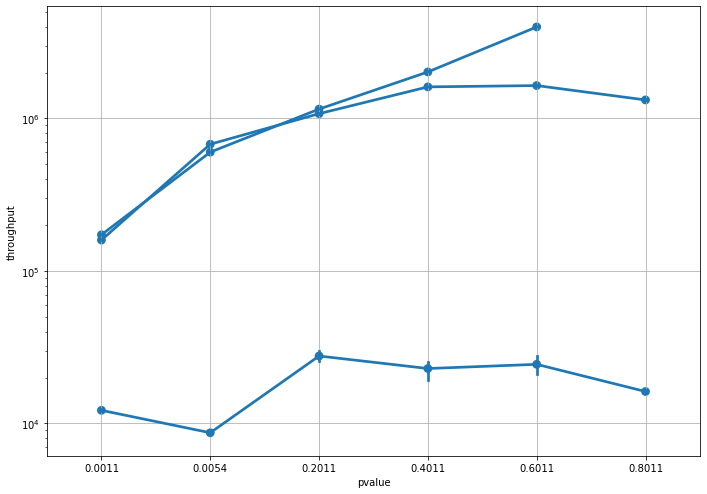

In [87]:
fig,ax = pyplot.subplots(figsize=dims)
ax.set(yscale="log")
seaborn.pointplot(ax=ax, x="pvalue", y="throughput", data=allData.query('senders==2'), err_style="bars", ci=68)
seaborn.pointplot(ax=ax, x="pvalue", y="throughput", data=allData.query('senders==8'), err_style="bars", ci=68)
seaborn.pointplot(ax=ax, x="pvalue", y="throughput", data=allData.query('senders==184'), err_style="bars", ci=68)
ax.grid(True)

In [128]:
allData.senders.unique()

array([  2,   3,   4,   6,   8,  11,  14,  18,  23,  29,  37,  47,  59,
        74,  93, 117, 147, 184])

In [107]:
lt = []
for index in allData.index:
    lt.append(str(allData["senders"][index]))

In [108]:
allData['sndName'] = lt

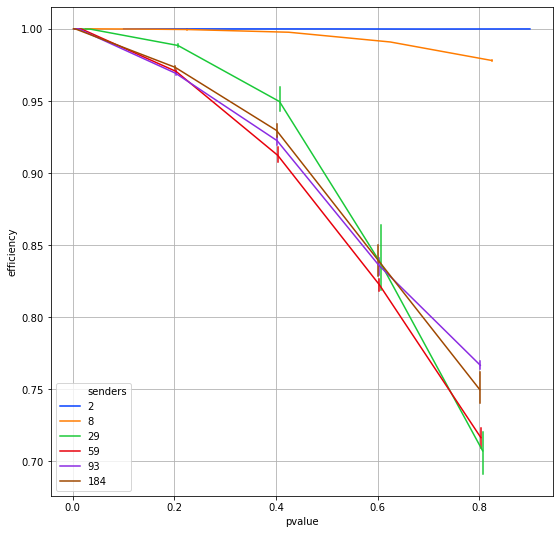

In [150]:
mypallete = seaborn.color_palette("bright", 6)
fig,ax = pyplot.subplots(figsize=dims)
#ax.set(yscale="log")
mydata=allData.query('senders in [2, 8, 29, 59, 93, 184]')
plot = seaborn.lineplot(ax=ax, x="pvalue", y="efficiency", hue='senders', palette=mypallete, err_style="bars", 
                        data=mydata)
ax.grid(True)
plot.figure.savefig("pp_efficiencya.png")